In [287]:
import altair as alt
import pandas as pd
import numpy as np
import os
os.getcwd()

'D:\\AnalyticLabs'

In [288]:
data_unemp = pd.read_excel('usdata/Unemployment.xls', sheet_name = 'Unemployment Med HH Inc')
data_unemp.dropna(inplace=True)
data_unemp.reset_index(drop=True, inplace=True)

In [289]:
data_unemp_agg = data_unemp[data_unemp.FIPS % 1000 == 0]
data_unemp_agg.reset_index(inplace=True, drop=True)
data_unemp = data_unemp[data_unemp.FIPS % 1000 != 0]

In [290]:
#data_unemp.columns

In [219]:
data_unemp.head()

,FIPS,State,Area_name,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
1,1001,AL,"Autauga County, AL",24383,23577,806,3.3,24687,23420,1267,...,25972.0,24958.0,1014.0,3.9,25957.0,25015.0,942.0,3.6,58343.0,121.1
2,1003,AL,"Baldwin County, AL",82659,80099,2560,3.1,83223,79372,3851,...,92090.0,88342.0,3748.0,4.1,93849.0,90456.0,3393.0,3.6,56607.0,117.5
3,1005,AL,"Barbour County, AL",10334,9684,650,6.3,10161,9267,894,...,8317.0,7831.0,486.0,5.8,8373.0,7940.0,433.0,5.2,32490.0,67.4
4,1007,AL,"Bibb County, AL",8791,8432,359,4.1,8749,8241,508,...,8550.0,8174.0,376.0,4.4,8661.0,8317.0,344.0,4.0,45795.0,95.0
5,1009,AL,"Blount County, AL",26629,25780,849,3.2,26698,25453,1245,...,24725.0,23726.0,999.0,4.0,25006.0,24128.0,878.0,3.5,48253.0,100.1


In [291]:
#data_unemp.info()

In [292]:
#Unemployement rates of differen years
Unemployment_rate_columns = [x for x in data_unemp.columns if 'Unemployment_rate' in x]

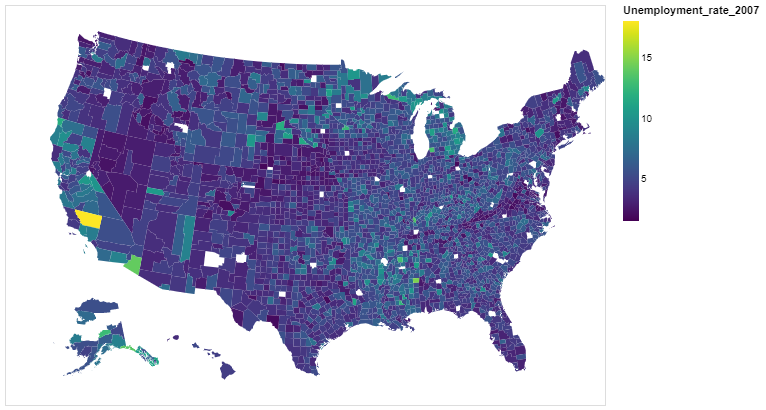

In [293]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
source = pd.read_csv('usdata/unemployment.tsv', sep='\t')

source['Unemployment_rate_2007'] = data_unemp[data_unemp.FIPS.isin(source.id)]['Unemployment_rate_2007']

alt.Chart(counties).mark_geoshape().encode(
    color='Unemployment_rate_2007:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['Unemployment_rate_2007'])
).project(
    type='albersUsa'
).properties(
    width=600,
    height=400
)

In [294]:
data_albama = data_unemp.iloc[0,:][['Unemployment_rate_2007',
 'Unemployment_rate_2008',
 'Unemployment_rate_2009',
 'Unemployment_rate_2010',
 'Unemployment_rate_2011',
 'Unemployment_rate_2012',
 'Unemployment_rate_2013',
 'Unemployment_rate_2014',
 'Unemployment_rate_2015',
 'Unemployment_rate_2016',
 'Unemployment_rate_2017',
 'Unemployment_rate_2018']].values

In [295]:
date_range = np.arange(2007,2019,1)

In [296]:
df_albama = pd.DataFrame(data_albama , date_range)
df_albama = df_albama.reset_index()
df_albama.columns = ['Years','Unemployement Rate']

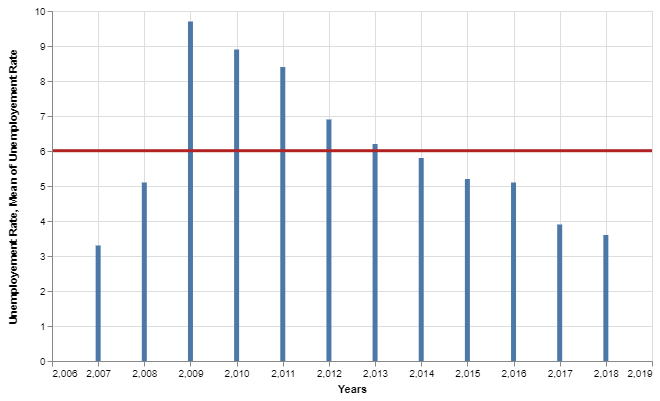

In [297]:
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='Years:Q',
    y='Unemployement Rate:Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).properties(
    width=600,
    height=350).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(Unemployement Rate):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=df_albama)

In [298]:
data_unemp_aggT = data_unemp_agg.T
data_unemp_aggT.columns = data_unemp_aggT.iloc[2,:]
#data_unemp_aggT

In [299]:
rate_cols = np.arange(6,54,4)
#rate_cols

In [272]:
data_line = pd.DataFrame(data_unemp_aggT.iloc[50,:])
data_line = data_line.reset_index()

In [276]:
data_line.sort_values('Unemployment_rate_2018', inplace=True)

In [279]:
data_line = data_line.reset_index(drop=True)

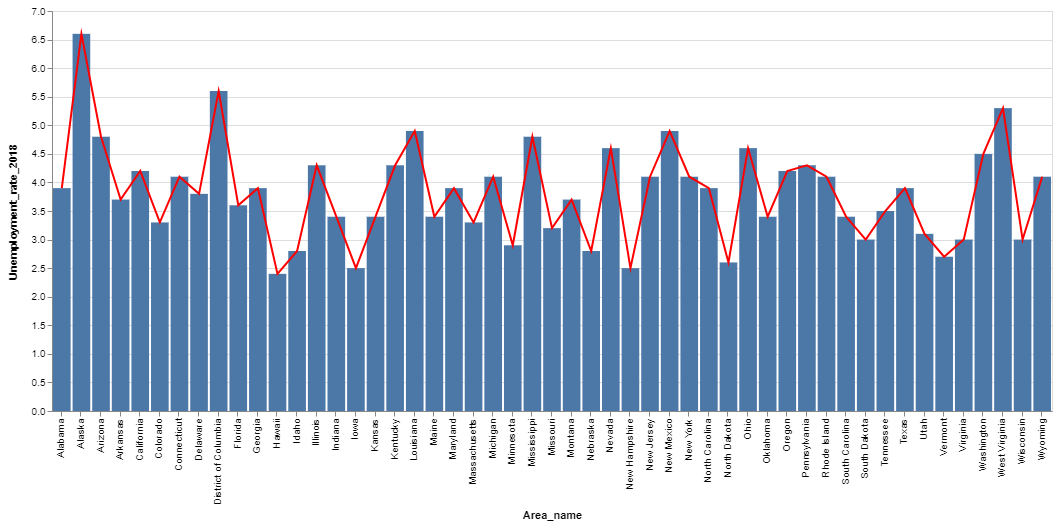

In [286]:
base = alt.Chart(data_line).encode(x='Area_name:O')

bar = base.mark_bar().encode(y='Unemployment_rate_2018:Q')
line =  base.mark_line(color='red').encode(
    y='Unemployment_rate_2018:Q'
)
(bar + line).properties(width=1000, height = 400)